Luis Adolfo Martínez 
**22000352** 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
import random
import matplotlib.pyplot as plt

**Practica 1 K-Means Y GMM**

In [ ]:
import os.path
from os import path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

In [ ]:
datos = pd.read_excel('estaturas.xlsx')
data_base = pd.read_excel('estaturas.xlsx')

In [ ]:
datos.head()

,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0


In [ ]:
type(datos)

pandas.core.frame.DataFrame

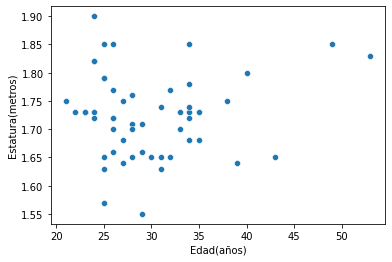

In [ ]:
sns.scatterplot(x="Edad(años)", y="Estatura(metros)", data=datos)

In [ ]:
def kmeans(df,epochs = 5,k = 2):
    descenso = np.array([])
    tamaño = len(df)
    
    #Tomamos posición del DF para nuestro k iniciales aleatoriamente.
    posicionRadom = np.random.choice(range(0, tamaño-1), k)
    
    listk = np.array([df[i] for i in posicionRadom])
   
    for i in range(epochs):
        # (x-x*)  (y - y*)
        #Realizamos difrencias de todos las datos con los centroides seleccionados
        diff = df[:,None]- listk

        # (x-x*)^2 + (y - y*)^2  para luego obtener distancia eculidiana
        sumcuadrado = np.sum(np.square(diff),axis=2)

        # distancia euclidiana 
        dis_euc = np.sqrt(sumcuadrado)

        # seleccion del k con la distancia mas cercana
        assi_k = np.argmin(dis_euc,axis=1)
        #obtenemos todos los minios de cada iteración para validar en donde converge
        descenso = np.append(descenso,sum(np.min(dis_euc,axis=1))/tamaño)
        for i in range(k):
          
            #creamos grupo por cada k->centroide
            subgrupo = df[assi_k==i]
            #obtenemos el promedio de cada grupo para el nuevo centroide
            listk[i] = np.average(subgrupo,axis=0)
    
    return (listk,assi_k,descenso)

In [ ]:
ks,assi_centroide,descenso = kmeans(datos.to_numpy(), epochs = 10,k = 4)


In [ ]:
datos.count()

Estatura(metros)    53
Edad(años)          53
dtype: int64

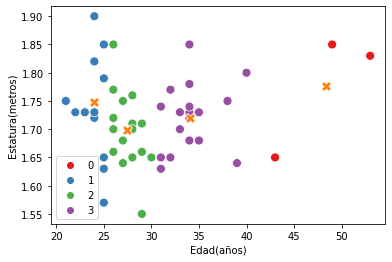

In [ ]:
datos['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

Escalado de los datos para que esten de 0 a 1, y ver si mejoramos el cluster

In [ ]:
data_esca = (data_base - np.min(data_base, axis =0))/(np.max(data_base, axis=0) - np.min(data_base,axis=0))

In [ ]:
data_esca

,Estatura(metros),Edad(años)
0,0.628571,0.15625
1,0.542857,0.31250
2,0.485714,0.09375
3,0.657143,0.40625
4,0.285714,0.34375
5,0.314286,0.25000
6,0.257143,0.18750
7,0.857143,0.40625
8,0.857143,0.15625
9,0.571429,0.00000


**Pruebas**

**K = 6**

In [ ]:
ks,assi_centroide,descenso = kmeans(datos.to_numpy(), epochs = 10,k = 6)

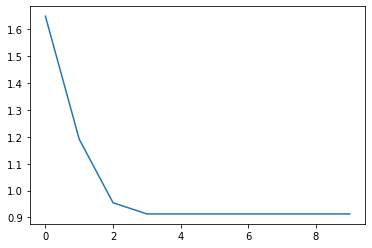

In [ ]:
plt.plot(descenso)

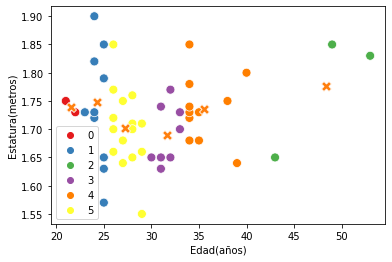

In [ ]:
datos['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

**K = 5**

In [ ]:
ks,assi_centroide,descenso = kmeans(datos.to_numpy(), epochs = 6,k = 5)

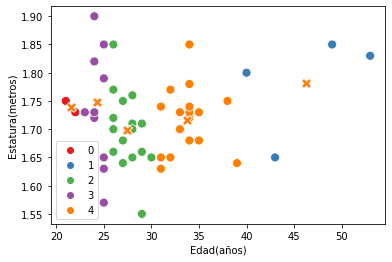

In [ ]:
datos['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

**K = 4**

In [ ]:
ks,assi_centroide,descenso = kmeans(datos.to_numpy(), epochs = 6,k = 4)

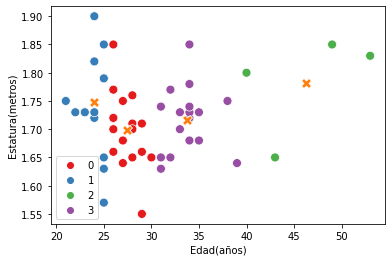

In [ ]:
datos['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

**K = 3**

In [ ]:
ks,assi_centroide,descenso = kmeans(datos.to_numpy(), epochs = 6,k = 3)

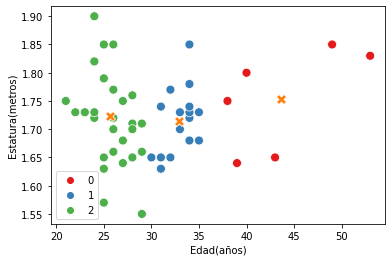

In [ ]:
datos['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

**K = 2**

In [ ]:
ks,assi_centroide,descenso = kmeans(datos.to_numpy(), epochs = 6,k = 2)

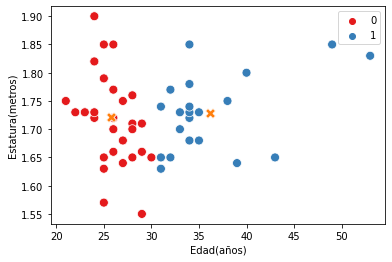

In [ ]:
datos['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

**GMM**

In [ ]:
datos_arr = datos.to_numpy()

In [ ]:
gmm = GaussianMixture(n_components=5).fit(datos.to_numpy())
k_gmm = gmm.predict(datos.to_numpy())


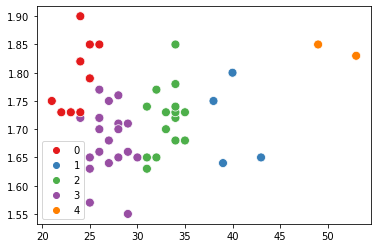

In [ ]:
sns.scatterplot(x=datos_arr[:,1], y =datos_arr[:,0], hue=k_gmm, palette="Set1", s=80)

**K = 4**

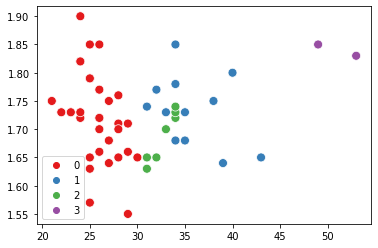

In [ ]:
gmm = GaussianMixture(n_components=4).fit(datos.to_numpy())
k_gmm = gmm.predict(datos.to_numpy())
sns.scatterplot(x=datos_arr[:,1], y =datos_arr[:,0], hue=k_gmm, palette="Set1", s=80)

**K=3**

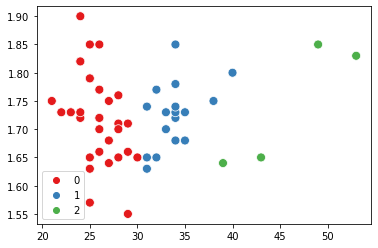

In [ ]:
gmm = GaussianMixture(n_components=3).fit(datos.to_numpy())
k_gmm = gmm.predict(datos.to_numpy())
sns.scatterplot(x=datos_arr[:,1], y =datos_arr[:,0], hue=k_gmm, palette="Set1", s=80)

**K = 2**

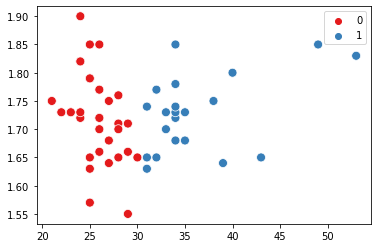

In [ ]:
gmm = GaussianMixture(n_components=2).fit(datos.to_numpy())
k_gmm = gmm.predict(datos.to_numpy())
sns.scatterplot(x=datos_arr[:,1], y =datos_arr[:,0], hue=k_gmm, palette="Set1", s=80)

**Método del codo**

Con respecto al metodo de codo nos indica que los K al elegir sería entre 1,2 o 3, como vemos en la gráfica.


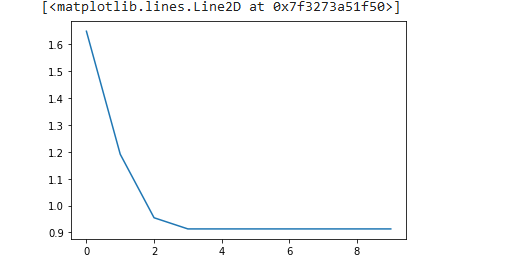

# Pestaña valtest(normales))

In [ ]:
datos_2 = pd.read_excel('estaturas.xlsx',sheet_name=1)   #('estaturas.xlsx' )

In [ ]:
datos_2

,Estatura(metros),Edad(años)
0,1.82,25.0
1,1.80,27.0
2,1.60,31.0
3,1.60,35.0
4,1.82,30.0
5,1.76,32.0
6,1.79,31.0
7,1.61,31.0


In [ ]:
ks,assi_centroide,descenso = kmeans(datos_2.to_numpy(), epochs = 10,k = 2)

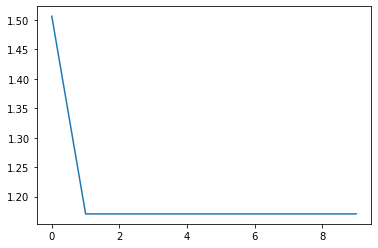

In [ ]:
plt.plot(descenso)

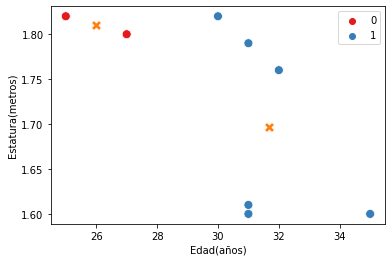

In [ ]:
datos_2['k'] =assi_centroide
sns.scatterplot(x="Edad(años)", y="Estatura(metros)",  palette="Set1",s=80,
                     hue="k", data=datos_2)

sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="X",s=100)

Según la gráfica de convergencia, para estos datos se necesitaria solo un K

**Probabilidad de pertenecer a cada cluter GMM.**

In [ ]:
datos_arr_2 = datos_2.to_numpy()

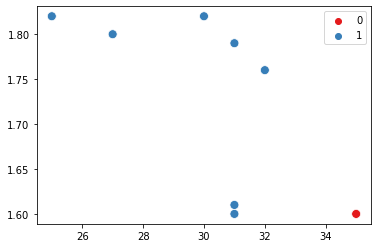

In [ ]:
gmm = GaussianMixture(n_components=2).fit(datos_2.to_numpy())
k_gmm = gmm.predict(datos_2.to_numpy())
sns.scatterplot(x=datos_arr_2[:,1], y =datos_arr_2[:,0], hue=k_gmm, palette="Set1", s=80)

**Conclusiones**

Respecto al Método del codo 

Con respecto al metodo de codo nos indica que los K al elegir sería entre 1,2 o 3, como vemos en la gráfica de covergencia.

y Como podemos observar en las pruebas para estos datos lo ideal sería elejir do K